In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

In [114]:
d=pd.read_csv("Mall_Customers.csv")
d

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [117]:
d.rename(columns={'Genre':'Gender'},inplace=True)

In [118]:
d

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [119]:
d['Gender'].replace(['Male','Female'],[0,1],inplace=True)

In [120]:
d

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [61]:
d.shape

(200, 5)

In [62]:
d.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [63]:
d[d==0].count()

CustomerID                 0
Genre                     88
Age                        0
Annual Income (k$)         0
Spending Score (1-100)     0
dtype: int64

<Axes: xlabel='Genre', ylabel='Spending Score (1-100)'>

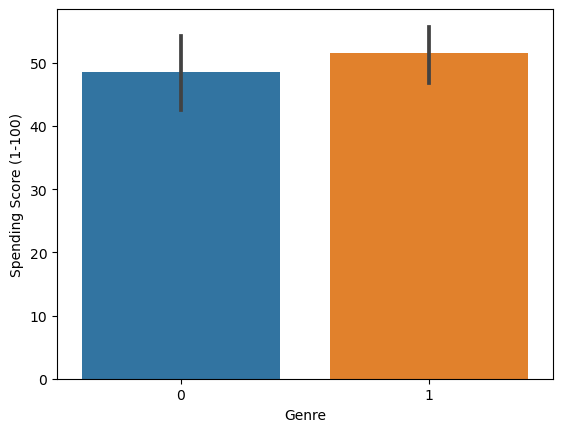

In [64]:
sns.barplot(data=d,x="Genre",y="Spending Score (1-100)")

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

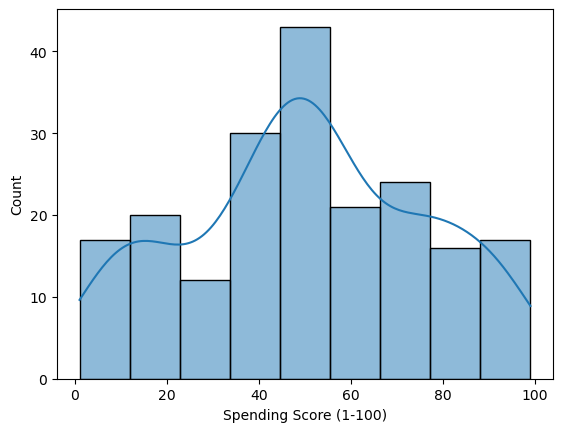

In [65]:
sns.histplot(d["Spending Score (1-100)"],kde=True)

<Axes: >

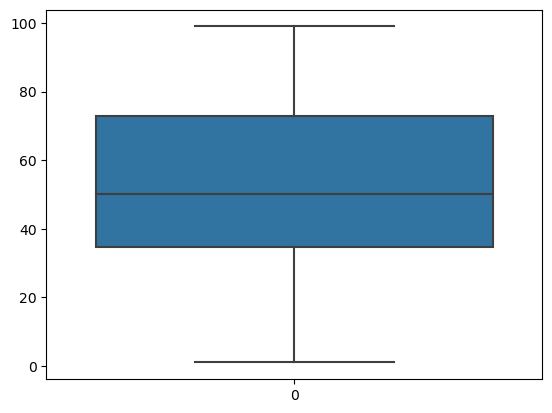

In [66]:
sns.boxplot(d["Spending Score (1-100)"])

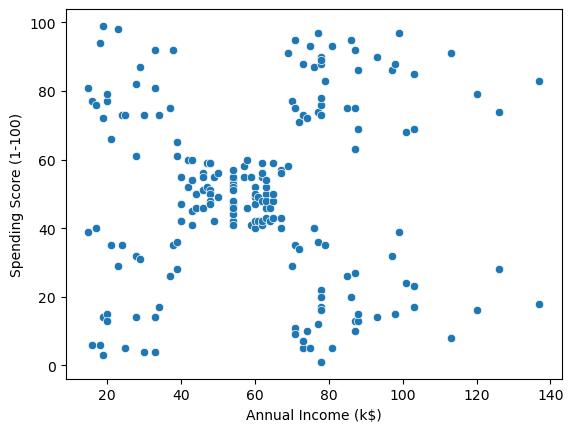

In [67]:
sns.scatterplot(data=d,x="Annual Income (k$)",y="Spending Score (1-100)")
plt.show()

In [68]:
d1=d[["Annual Income (k$)","Spending Score (1-100)"]]
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(d1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [69]:
kmeans.cluster_centers_

array([[87.        , 18.63157895],
       [44.15447154, 49.82926829],
       [86.53846154, 82.12820513]])

In [70]:
kmeans.inertia_

106348.37306211119

In [71]:
l=kmeans.labels_
l

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

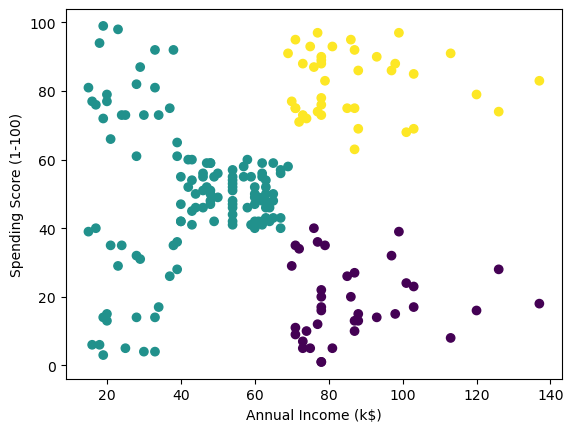

In [72]:
x=d[["Annual Income (k$)"]]
y=d[["Spending Score (1-100)"]]
plt.scatter(x,y,c=l)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [73]:

inertias=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=11,random_state=0)
    kmeans.fit(d1)
    inertias.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

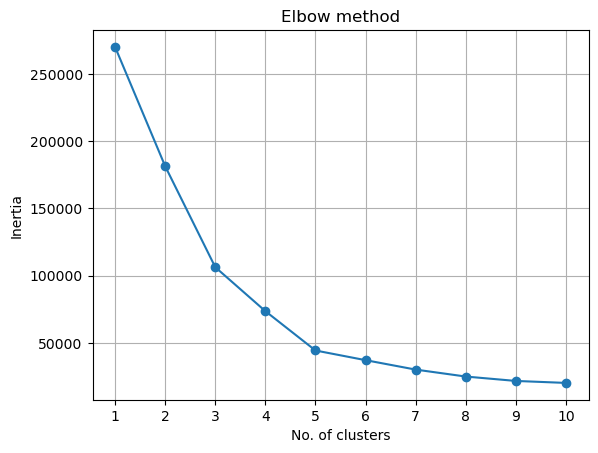

In [75]:

plt.title("Elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("Inertia")
plt.xticks(range(1,11))
plt.grid()
plt.plot(range(1,11),inertias,marker='o')
plt.show()

In [76]:
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(d1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [80]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

l1=kmeans.labels_
l1

In [82]:
kmeans.inertia_

44448.45544793371

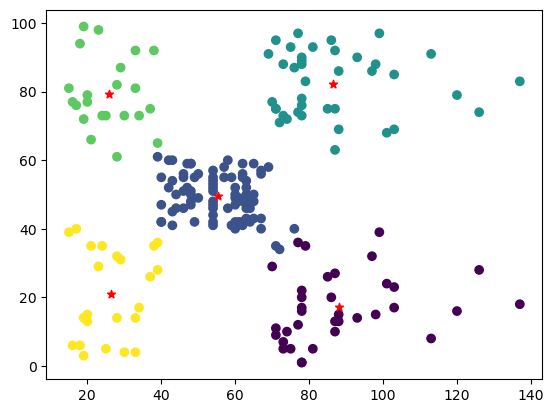

In [84]:
plt.scatter(x,y,c=l1)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='*',color='r')

In [86]:
d[l1==0]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
124,125,1,23,70,29
128,129,0,59,71,11
130,131,0,47,71,9
134,135,0,20,73,5
136,137,1,44,73,7
138,139,0,19,74,10
140,141,1,57,75,5
144,145,0,25,77,12
146,147,0,48,77,36
148,149,1,34,78,22


In [87]:
d[l1==1]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
43,44,1,31,39,61
46,47,1,50,40,55
47,48,1,27,40,47
48,49,1,29,40,42
49,50,1,31,40,42
...,...,...,...,...,...
121,122,1,38,67,40
122,123,1,40,69,58
126,127,0,43,71,35
132,133,1,25,72,34


In [89]:
d[l1==2]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
123,124,0,39,69,91
125,126,1,31,70,77
127,128,0,40,71,95
129,130,0,38,71,75
131,132,0,39,71,75
133,134,1,31,72,71
135,136,1,29,73,88
137,138,0,32,73,73
139,140,1,35,74,72
141,142,0,32,75,93


In [88]:
d[l1==3]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,2,0,21,15,81
3,4,1,23,16,77
5,6,1,22,17,76
7,8,1,23,18,94
9,10,1,30,19,72
11,12,1,35,19,99
13,14,1,24,20,77
15,16,0,22,20,79
17,18,0,20,21,66
19,20,1,35,23,98


In [90]:
d[l1==4]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
2,3,1,20,16,6
4,5,1,31,17,40
6,7,1,35,18,6
8,9,0,64,19,3
10,11,0,67,19,14
12,13,1,58,20,15
14,15,0,37,20,13
16,17,1,35,21,35
18,19,0,52,23,29


In [93]:
kmeans.predict([[39,28]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4])

In [94]:
from sklearn.cluster import AgglomerativeClustering

In [95]:
agl=AgglomerativeClustering(n_clusters=5)
agl.fit(d1)

AgglomerativeClustering(n_clusters=5)

In [98]:
a=agl.labels_
a

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

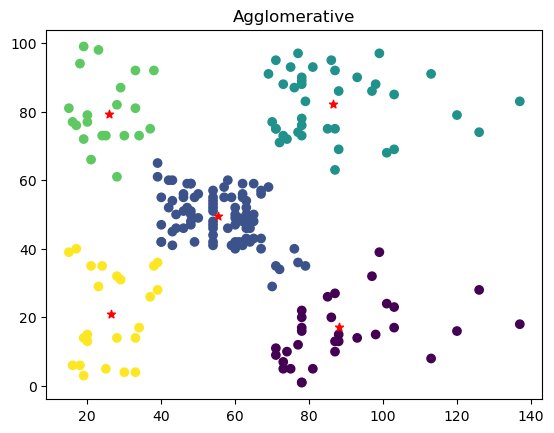

In [103]:
plt.title("Agglomerative")
plt.scatter(x,y,c=a)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='*',color='red')

In [105]:
b=linkage(d1,method='ward')

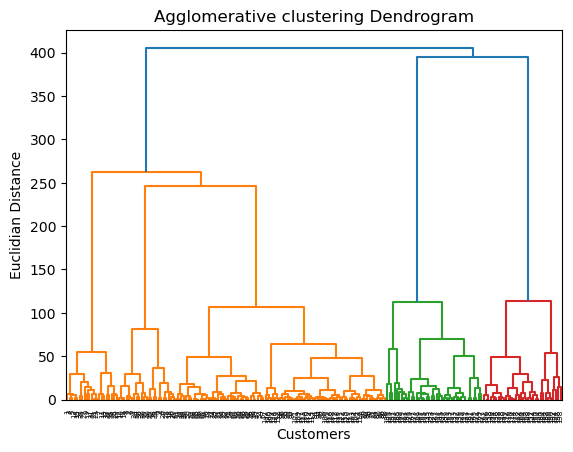

In [107]:
dendrogram(b)
plt.title("Agglomerative clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidian Distance")
plt.show()